In [1]:
# retreiving the results from before (USENIX21)

In [12]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [25]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
from datasets import GermanCredit

In [26]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [27]:
# from [testing branch] robustness_vs_utility/combined_attack_full_experiment.py
def plot(robustness_data, utility_data, data_name):
    sns.set_style('whitegrid')
    sns.set_palette('cubehelix')  # icefire, Spectral, cubehelix
    fig, axs = plt.subplots(1,2, figsize=(14,5))

    robustness_data.plot(kind='bar', stacked=False, width=0.75, ylim=(0, 1), ax=axs[0])
    plt.subplots_adjust(bottom=0.35)
    # plt.title('')
    axs[0].set_xlabel('attack configuration')
    xtick_labels = ["(0%; 10%; 10%)", '(0%; 30%; 10%)', "(10%; 10%; 10%)", '(10%; 30%; 10%)',
                    "(30%; 10%; 10%)", '(30%; 30%; 10%)', '(0%; 10%; 30%)', '(0%; 30%; 30%)', 
                    '(10%; 10%; 30%)', '(10%; 30%; 30%)', '(30%; 10%; 30%)', '(30%; 30%; 30%)']
    axs[0].set_xticklabels(xtick_labels)
    #axs[0].set_xticklabels([i for i in range(len(robustness_data))], xtick_labels, rotation=90)
    axs[0].set_ylabel('detection rate')
    axs[0].legend(title='%marks', loc='lower left')

    sns.set_palette('colorblind')
    utility_data.plot(kind='line', marker='o', linewidth=0.2, legend=False, ax=axs[1])
    plt.xlabel('attack configuration')
    plt.xticks([i for i in range(len(robustness_data))], xtick_labels, rotation=90)
    axs[1].set_ylabel('accuracy loss rel to initial accuracy')
    axs[1].set_yticks([2,3,4,5,6,7,8])
    axs[1].set_yticklabels(['2%','3%', '4%','5%','6%', '7%', '8%'])
    axs[1].legend(title='%marks')
    plt.savefig("combined-german.svg")

In [28]:
# from [testing branch] robustness_vs_utility/combined_attack_full_experiment.py->main
results_robustness = pd.read_csv("robustness_vs_utility/combined_attack/robustness_german_credit.csv",
                                     index_col='Unnamed: 0')
results_robustness = results_robustness.rename(lambda x: round(1/int(x),2), axis='columns')
results_robustness = results_robustness.drop('baseline', axis=0)
print(results_robustness)

gammae = {'german_credit': [3, 7, 10, 20]}
# converting detection rate to fm
#for gamma in gammae['german_credit']:
#    results_robustness[str(gamma)] = results_robustness[str(gamma)].apply(lambda x: 1 - x)
#print(results_robustness)

results_utility = pd.read_csv("robustness_vs_utility/combined_attack/classification_german_credit_gb.csv", 
                              index_col='attack')
results_utility = results_utility.rename(lambda x: round(1/int(x),2), axis='columns')
print(results_utility)
for col in results_utility.columns:
    results_utility[col] = 100*(results_utility[col]['baseline'] - results_utility[col]) / results_utility[col]['baseline']
results_utility = results_utility.drop('baseline', axis=0)
print(results_utility)

                   0.33      0.14      0.10      0.05
[0.9, 0, 0.1]  1.000000  1.000000  0.993333  0.760000
[0.7, 0, 0.1]  1.000000  0.993333  0.993333  0.606667
[0.9, 1, 0.1]  1.000000  0.986667  0.980000  0.786667
[0.7, 1, 0.1]  1.000000  0.980000  0.933333  0.586667
[0.9, 3, 0.1]  1.000000  0.980000  0.886667  0.620000
[0.7, 3, 0.1]  1.000000  0.940000  0.753333  0.460000
[0.9, 0, 0.3]  1.000000  0.893333  0.806667  0.300000
[0.7, 0, 0.3]  0.980000  0.840000  0.600000  0.213333
[0.9, 1, 0.3]  0.993333  0.793333  0.693333  0.233333
[0.7, 1, 0.3]  0.980000  0.720000  0.453333  0.220000
[0.9, 3, 0.3]  0.980000  0.640000  0.566667  0.213333
[0.7, 3, 0.3]  0.966667  0.546667  0.406667  0.173333
                   0.33      0.14      0.10      0.05
attack                                               
baseline       0.765000  0.774000  0.765000  0.776000
[0.9, 0, 0.1]  0.747748  0.744639  0.742700  0.743263
[0.7, 0, 0.1]  0.743064  0.741211  0.737161  0.739769
[0.9, 1, 0.1]  0.746100  0.7

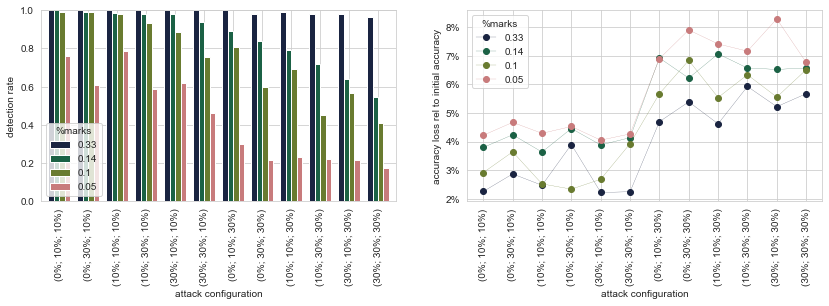

In [29]:
plot(results_robustness, results_utility, 'german_credit')

In [24]:
# placeholder for other 2 datasets